In [2]:
import pandas as pd
import keras_vggface
from mtcnn.mtcnn import MTCNN
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
female_names = pd.read_csv("female_names.txt",header=None)

In [3]:
female_names[0][10:20]

10       Afton_Smith_0001.jpg
11     Agbani_Darego_0001.jpg
12    Agnes_Bruckner_0001.jpg
13       Ai_Sugiyama_0001.jpg
14       Ai_Sugiyama_0002.jpg
15       Ai_Sugiyama_0003.jpg
16       Ai_Sugiyama_0004.jpg
17     Harriet_Lessy_0001.jpg
18       Ai_Sugiyama_0005.jpg
19    Aicha_El_Ouafi_0001.jpg
Name: 0, dtype: object

In [3]:
pixels = plt.imread("leo.jpg")

In [4]:
print(pixels.shape)
imshape = pixels.shape

(395, 301, 3)


In [5]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

In [6]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height


In [7]:
x1, y1, width, height = results[0]['box']
x1 = int(0.5*x1)
y1 = int(0.5*y1)
x2, y2 = int(x1 + width), int(y1 + height)
x2 = int(x2+0.5*(imshape[1]-x2))
y2 = int(y2+0.5*(imshape[0]-y2))

In [8]:
# extract the face
face = pixels[y1:y2, x1:x2]

In [9]:
from PIL import Image
# resize pixels to the model size
image = Image.fromarray(face)
print(type(image))
image = image.resize((224, 224))
image.save("leoface.jpg")
face_array = np.asarray(image)

<class 'PIL.Image.Image'>


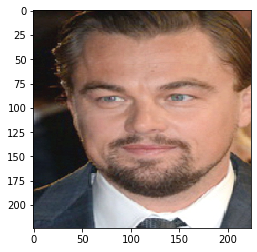

In [10]:
plt.imshow(face_array)

In [24]:
print(results[0]["confidence"])

0.9999929666519165


In [11]:
face_img = plt.imread("leoface.jpg")

In [12]:
face_img.shape

(224, 224, 3)